In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.7.1+cu118'

## Get Data

In [3]:
weights = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weights * X + bias

X.size(), X[:10], y[:10]

(torch.Size([50, 1]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
train_split = int(len(X) * 0.8)

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
    
    """
    Plots the training, test and predictions
    """

    plt.scatter(train_data, train_label, c='r', s=4, label="Training data")

    plt.scatter(test_data, test_label, c='b', s=4, label="Testing data")

    if predictions is not None :

        plt.scatter(test_data, predictions, c='black', s=4, label="Predictions")

    plt.legend(prop={"size" : 14})

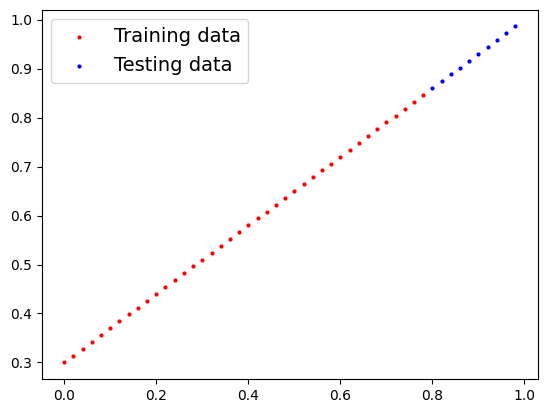

In [6]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test)

## Build Model

In [7]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float,
                                                requires_grad=True))
        

        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float,
                                             requires_grad=True))
        
    def forward(self, x: torch.tensor) -> torch.tensor:

            return self.weights * x + self.bias

In [51]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

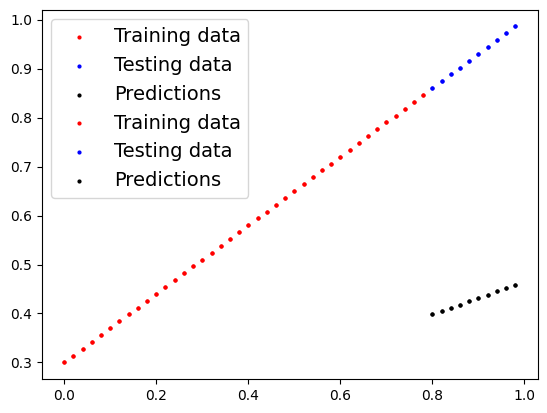

In [53]:
# make predictions on test data

with torch.inference_mode():

    y_preds = model_0(X_test)

plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=y_preds)


with torch.no_grad():

    y_preds = model_0(X_test)

plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=y_preds)

In [92]:
# let's create the loss function and optimizer

loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [93]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    # TESTING   

    model_0.eval()

    with torch.inference_mode():

        test__pred = model_0(X_test)

        test_loss = loss_fn(test__pred, y_test.type(torch.float))

    if epoch % 10 == 0:

        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} ----- | MAE Train Loss: {loss} ----- | MAE Test Loss: {test_loss}")


Epoch: 0 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 10 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 20 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 30 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 40 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 50 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 60 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 70 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 80 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882
Epoch: 90 ----- | MAE Train Loss: 0.008932482451200485 ----- | MAE Test Loss: 0.005023092031478882


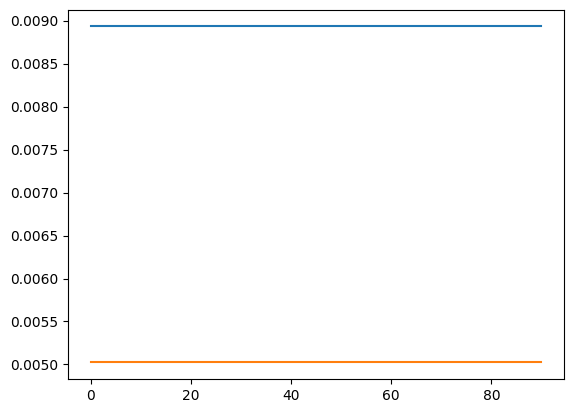

In [94]:
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")

# test_loss_values, train_loss_values